In [13]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# data load
df = pd.read_csv('train.csv')

In [3]:
df['label'].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

In [4]:
# data preprocessing
df.drop(['index'], axis=1, inplace=True)

In [5]:
# train, test split
X = df.drop(['label'], axis = 1)
y = df['label']

X_train , X_test , y_train , y_test = train_test_split(X, y,
                                                       test_size=0.2,  random_state=156)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(48000, 784)
(12000, 784)
(48000,)
(12000,)


In [7]:
y_train = np.asarray(y_train[:48000])
y_test = np.asarray(y_test[:12000])
X_train = np.asarray(X_train[:48000] / 255.0)
X_test = np.asarray(X_test[:12000] / 255.0)

In [8]:
# 모델 구축
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256,input_shape = (784,),activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256,activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256,activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10,activation = 'softmax')])

model.summary()

In [9]:
# 모델 컴파일
model.compile(tf.keras.optimizers.Adam(lr=0.0001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [10]:
# 모델 훈련
history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=30,
                    validation_data=(X_test, y_test))

Epoch 1/30
750/750 [==============================] - 2s 3ms/step - loss: 0.8899 - accuracy: 0.7220 - val_loss: 0.3015 - val_accuracy: 0.9129
Epoch 2/30
750/750 [==============================] - 2s 2ms/step - loss: 0.3624 - accuracy: 0.8909 - val_loss: 0.2119 - val_accuracy: 0.9369
Epoch 3/30
750/750 [==============================] - 2s 2ms/step - loss: 0.2737 - accuracy: 0.9184 - val_loss: 0.1725 - val_accuracy: 0.9473
Epoch 4/30
750/750 [==============================] - 2s 2ms/step - loss: 0.2231 - accuracy: 0.9341 - val_loss: 0.1477 - val_accuracy: 0.9542
Epoch 5/30
750/750 [==============================] - 2s 2ms/step - loss: 0.1900 - accuracy: 0.9434 - val_loss: 0.1297 - val_accuracy: 0.9597
Epoch 6/30
750/750 [==============================] - 2s 3ms/step - loss: 0.1649 - accuracy: 0.9504 - val_loss: 0.1178 - val_accuracy: 0.9639
Epoch 7/30
750/750 [==============================] - 2s 2ms/step - loss: 0.1472 - accuracy: 0.9551 - val_loss: 0.1070 - val_accuracy: 0.9659
Epoch 

In [11]:
# 모델 평가
loc, acc = model.evaluate(X_test, y_test, verbose=2)
print('정확도:{:5.2f}%'.format(acc*100))

375/375 - 0s - loss: 0.0724 - accuracy: 0.9807
정확도:98.07%


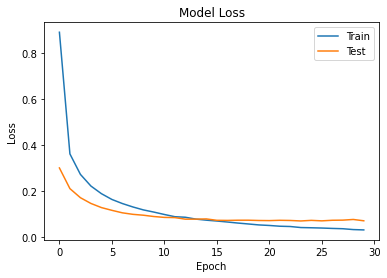

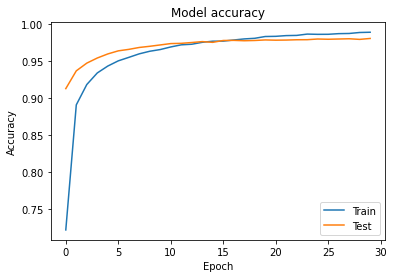

In [14]:
def plot_loss(history):
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)

def plot_acc(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)

plot_loss(history)
plt.show()
plot_acc(history)
plt.show()

In [15]:
# test, submission file load
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

In [16]:
test.drop(['index'], axis=1, inplace=True)

In [17]:
# 실 데이터 예측
pred = model.predict_classes(test)
pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, ..., 4, 5, 6])

In [18]:
sub['label'] = pred
sub['label']

0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: label, Length: 10000, dtype: int64

In [19]:
sub.to_csv("sub.csv", index=False)